# Chicago Crime Rate Prediction -- Preprocess

This project is to use big data to prediction the Crime Rate of  Chicago.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

### Dataset for Crimes

This dataset includes all crime record from 2001 to present.

There include the following information for each record:
['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',  'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',  'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']

In [6]:
data = pd.read_csv('Crimes_-_2001_to_present.csv',header=0)
# data = data.drop(['ID', 'Case Number', 'Domestic', 'Beat', 'Ward', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Updated On', 'FBI Code'],axis=1)
data = data.dropna() 
data=data[~data['Community Area'].isin([0.0])]
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [7]:
data.shape

(6130365, 22)

In [10]:
data.values[0]

array([10000092, 'HY189866', '03/18/2015 07:44:00 PM', '047XX W OHIO ST',
       '041A', 'BATTERY', 'AGGRAVATED: HANDGUN', 'STREET', False, False,
       1111, 11.0, 28.0, 25.0, '04B', 1144606.0, 1903566.0, 2015,
       '02/10/2018 03:50:01 PM', 41.891398861, -87.74438456700001,
       '(41.891398861, -87.744384567)'], dtype=object)

In [30]:
crime_data = data.drop(['ID', 'Case Number', 'IUCR', 'Domestic', 'Description', 'Beat', 'Ward', 'District', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Location', 'Longitude', 'Updated On', 'FBI Code'],axis=1)
crime_data.head()

,Date,Block,Primary Type,Location Description,Arrest,Community Area,Year
0,03/18/2015 07:44:00 PM,047XX W OHIO ST,BATTERY,STREET,False,25.0,2015
1,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,OTHER OFFENSE,STREET,True,67.0,2015
2,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,BATTERY,APARTMENT,False,39.0,2015
3,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,BATTERY,APARTMENT,False,40.0,2015
4,03/18/2015 09:00:00 PM,047XX W ADAMS ST,ROBBERY,SIDEWALK,False,25.0,2015


In [43]:
crime_data.to_csv("crime_data.csv", index=0)

### Dataset for Population

This dataset is the Chicago census.

In [17]:
population = pd.read_csv('CCASF12010CMAP.csv',header=1)
population = population[['Geog', 'GeogKey', 'Total Population']]
population["Population Rate"] = round(population.iloc[:,2]/population.iloc[:,2].sum(),3)
population.head()

,Geog,GeogKey,Total Population,Population Rate
0,Rogers Park,1,54991,0.020
1,West Ridge,2,71942,0.027
2,Uptown,3,56362,0.021
3,Lincoln Square,4,39493,0.015
4,North Center,5,31867,0.012


In [18]:
population.shape

(77, 4)

In [22]:
population.columns

Index(['Geog', 'GeogKey', 'Total Population', 'Population Rate'], dtype='object')

In [42]:
population.to_csv("population.csv", index=0)

### Dataset for Community code

In [36]:
code = pd.read_csv('CommAreas.csv',header=0)
code = code.sort_values(by='AREA_NUMBE').reset_index(drop=True)
code = code[['AREA_NUMBE', 'COMMUNITY']].reset_index(drop=True)
code.head()

,AREA_NUMBE,COMMUNITY
0,1,ROGERS PARK
1,2,WEST RIDGE
2,3,UPTOWN
3,4,LINCOLN SQUARE
4,5,NORTH CENTER


In [37]:
code.shape

(77, 2)

In [44]:
code.to_csv("community_code.csv",  index=0)

## Functions for preprocessing data

### Set time and day

This fuinction used to set set the time, day, and date (MM/DD/YYYY) for each record.

In [69]:
def find_time(time):
    if time >= 5 and time < 12:
        return "Morning"
    elif time >= 12 and time < 17:
        return "Afternoon"
    elif time >= 17 and time < 21:
        return "Evening"
    else:
        return "Night"

# print(find_time(4))
def find_day(day):
    if day >= 1 and day <= 5:
        return "Weekday"
    else:
        return "Weekend"
    
def change_day_int(day):
    if d == "Weekday":
        return 1
    return 2

def change_time_int(time):
    if time == "Morning":
        return 1
    elif time == "Afternoon":
        return 2
    elif time == "Evening":
        return 3
    else:
        return 4

In [70]:
def add_time_day(com_data):
    dates = com_data['Date']
    time = []
    day = []
    year = []
    for date in dates:
        dat = datetime.strptime(date, '%m/%d/%Y %I:%M:%S %p')
        t = find_time(dat.hour)
        d = find_day(dat.isoweekday())
        year.append(date[0:10])
        time.append(t)
        day.append(d)
    com_data.insert(1, 'Time', time)
    com_data.insert(2, 'Day', day)
    com_data.insert(3, 'Month/Day/Year', year)
    return com_data

In [73]:
def select_data(ID):
#     com_data = pd.DataFrame()
    com_data = datas[datas['Community Area'] == ID].reset_index(drop=True)
    return com_data

In [75]:
pro_data = select_data(1.0)
pro_dataS= add_time_day(pro_data)
pro_dataS.head()

,Date,Time,Day,Month/Day/Year,Block,IUCR,Primary Type,Description,Location Description,Arrest,District,Community Area,Year,Location
0,03/18/2015 05:00:00 PM,Evening,Weekday,03/18/2015,016XX W PRATT BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,24.0,1.0,2015,"(42.005361858, -87.671555401)"
1,03/18/2015 04:00:00 PM,Afternoon,Weekday,03/18/2015,067XX N GLENWOOD AVE,0820,THEFT,$500 AND UNDER,STREET,False,24.0,1.0,2015,"(42.004740764, -87.66571183)"
2,03/17/2015 10:00:00 AM,Morning,Weekday,03/17/2015,014XX W SHERWIN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,24.0,1.0,2015,"(42.014983368, -87.666881621)"
3,03/18/2015 04:00:00 PM,Afternoon,Weekday,03/18/2015,069XX N CLARK ST,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,OTHER,False,24.0,1.0,2015,"(42.008437485, -87.673834227)"
4,03/18/2015 10:00:00 PM,Night,Weekday,03/18/2015,015XX W JONQUIL TER,0820,THEFT,$500 AND UNDER,STREET,False,24.0,1.0,2015,"(42.021138268, -87.668723692)"


### Processing data 

In [89]:
def process_data2(ID):
    time = ["Morning", "Afternoon", "Evening","Night"]
    day = ["Weekday", "Weekend"]
    pro_data = select_data(ID)
    pro_data= add_time_day(pro_data)
#     print(pro_data.shape)
    columnNames = ['Community Name', 'Population Rate', 'Time',  'Day', 'Date', 'Count']
    part_com = pd.DataFrame(columns = columnNames)
    
    comName = code[code['AREA_NUMBE'] == int(ID)]['COMMUNITY'].values[0]
    
    pop_density = population[population['GeogKey'] == int(ID)]['Population Rate'].values[0]
    
    comNames = []
    times = []
    days = []
    years = []
    counts = []
    pop_densitys = []
    
    comNames_int = []
    int_time = []
    int_day = []
    int_counts = []
    d= 1
    
    for i in day:
        t = 1
        dataI = pro_data[pro_data['Day'] == i]
        for j in time:
            
            dataJ = dataI[dataI['Time'] == j]
            
            count_year = dataJ['Month/Day/Year'].value_counts().sort_index()
            
            comNames.extend([comName] * count_year.shape[0] )
            pop_densitys.extend([pop_density] * count_year.shape[0] )
            times.extend([j] * count_year.shape[0] )
            days.extend([i] * count_year.shape[0] )
            
            years.extend(count_year.index)
            sums = count_year.values.sum()
            c = [i/pro_data.shape[0] for i in count_year.values]
            counts.extend(c)
            
#             counts.extend(count_year.values)
            comNames_int.extend([int(ID)] * count_year.shape[0] )
            int_time.extend([t] * count_year.shape[0] )
            int_day.extend([d] * count_year.shape[0] )
            int_counts.extend(count_year.values)
            t += 1
        d += 1
    
    list1 = [comNames, pop_densitys, times, days, years, counts]
    part_com = pd.DataFrame()
    for i in range(len(columnNames)):
        part_com[columnNames[i]] = list1[i]
        
        
    list2 = [comNames_int, pop_densitys, int_time, int_day, years, int_counts]
    part_com_int = pd.DataFrame()
    for i in range(len(columnNames)):
        part_com_int[columnNames[i]] = list2[i]
        
    return part_com, part_com_int

In [90]:
datas = data.drop(['ID', 'Case Number', 'Domestic', 'Beat', 'Ward', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Updated On', 'FBI Code'],axis=1)
com2_1, com2_2= process_data2(1.0)
# print(2/93901)
com2_1.head()

,Community Name,Population Rate,Time,Day,Date,Count
0,ROGERS PARK,0.02,Morning,Weekday,01/01/2002,0.000021
1,ROGERS PARK,0.02,Morning,Weekday,01/01/2003,0.000106
2,ROGERS PARK,0.02,Morning,Weekday,01/01/2004,0.000064
3,ROGERS PARK,0.02,Morning,Weekday,01/01/2007,0.000053
4,ROGERS PARK,0.02,Morning,Weekday,01/01/2008,0.000106


In [91]:
com2_2.head()

,Community Name,Population Rate,Time,Day,Date,Count
0,1,0.02,1,1,01/01/2002,2
1,1,0.02,1,1,01/01/2003,10
2,1,0.02,1,1,01/01/2004,6
3,1,0.02,1,1,01/01/2007,5
4,1,0.02,1,1,01/01/2008,10


In [92]:
columnNames = ['Community Name', 'Population Rate', 'Time',  'Day', 'Date', 'Count']

vals = []

vals_int = []
for i in range(1,78):
    com_pro, com_pro_int = process_data2(float(i))
    vals.extend(com_pro.values)
    vals_int.extend(com_pro_int.values)
# print(len(vals))
com_datas = pd.DataFrame(vals, columns = columnNames)
com_datas_int = pd.DataFrame(vals_int, columns = columnNames)

In [93]:
def set_hight_low(c, s):
    if c <= s:
        return 'low'
    else:
        return 'high'
s = com_datas_int['Count'].mean()
com_datas_int["Class"] = [set_hight_low(i, s) for i in com_datas_int['Count']]
com_datas_int.head()

,Community Name,Population Rate,Time,Day,Date,Count,Class
0,1,0.02,1,1,01/01/2002,2,low
1,1,0.02,1,1,01/01/2003,10,high
2,1,0.02,1,1,01/01/2004,6,high
3,1,0.02,1,1,01/01/2007,5,high
4,1,0.02,1,1,01/01/2008,10,high


In [94]:
com_datas_int.to_csv("com_datas_int.csv",  index=0)

In [95]:
com_datas.to_csv("com_datas.csv",  index=0)

In [96]:
Y = com_datas_int['Class']
cols = ['Community Name', 'Time', 'Day']
X = com_datas_int.drop(['Date', 'Count', 'Class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

In [97]:
numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier(n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test Accuracy =', accuracy_score(Y_test, Y_pred))

Test Accuracy = 0.8107507137252834


In [36]:
from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

Text(0, 0.5, 'Accuracy')

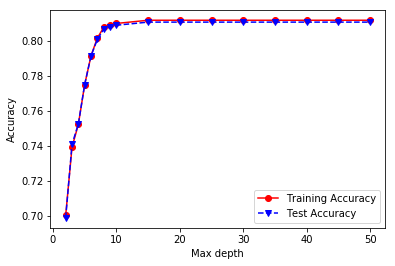

In [37]:
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [38]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
tree_acc

0.7407973943258016

Best hyperparameter, maxdepth = 15
Test Accuracy = 0.8107507137252834


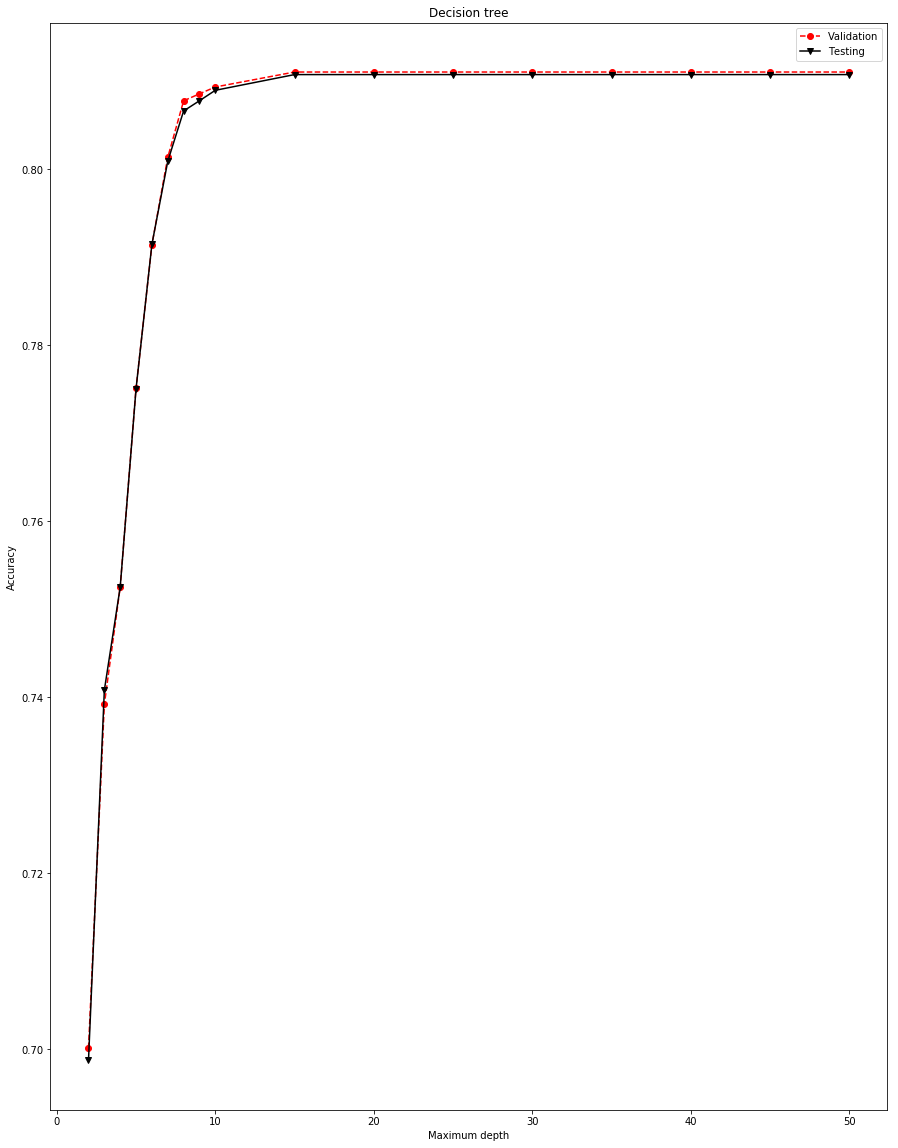

In [49]:
from sklearn.model_selection import cross_val_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

numFolds = 5
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1


plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])


bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])


In [42]:
print(validationAcc)
print(testAcc)

[0.7001289  0.73917787 0.7525063  0.77511482 0.79140033 0.80134635
 0.80776825 0.80856605 0.80934076 0.81104184 0.81104184 0.81104184
 0.81104184 0.81104184 0.81104184 0.81104184 0.81104184]
[0.69872881 0.74079739 0.75250875 0.77505374 0.79145293 0.80090032
 0.80661506 0.80777796 0.80896393 0.81075071 0.81075071 0.81075071
 0.81075071 0.81075071 0.81075071 0.81075071 0.81075071]
